In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
files = {
    "AS_acceptor": "POS_acceptor_600.csv",
    "AS_donor": "POS_donor_600.csv",
    "GS_acceptor": "POS_acceptorGS_600.csv",
    "GS_donor": "POS_donorGS_600.csv"
}

results = {}

In [11]:
for label, file in files.items():
    df = pd.read_csv(file)

    # Detect column with sequences automatically
    seq_col = None
    for col in df.columns:
        if df[col].dtype == "object":  # likely the sequence column
            seq_col = col
            break
    
    if seq_col is None:
        raise ValueError(f"No sequence column found in {file}")
    
    # Count GT and AG
    df['GT_count'] = df[seq_col].str.count("GT")
    df['AG_count'] = df[seq_col].str.count("AG")

    results[label] = {
        "GT_donors": df['GT_count'].sum(),
        "AG_acceptors": df['AG_count'].sum()
    }

In [12]:
results_df = pd.DataFrame(results).T
print("Summary of GT and AG counts:\n")
print(results_df)

Summary of GT and AG counts:

             GT_donors  AG_acceptors
AS_acceptor     414643        462427
AS_donor        413834        463849
GS_acceptor     378625        461150
GS_donor        371332        452546


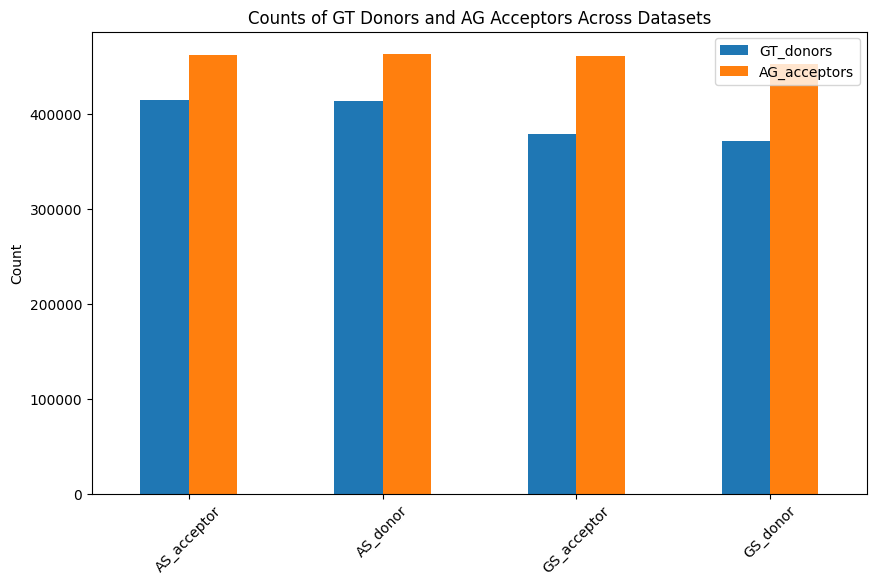

In [13]:
results_df.plot(kind="bar", figsize=(10,6))
plt.title("Counts of GT Donors and AG Acceptors Across Datasets")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


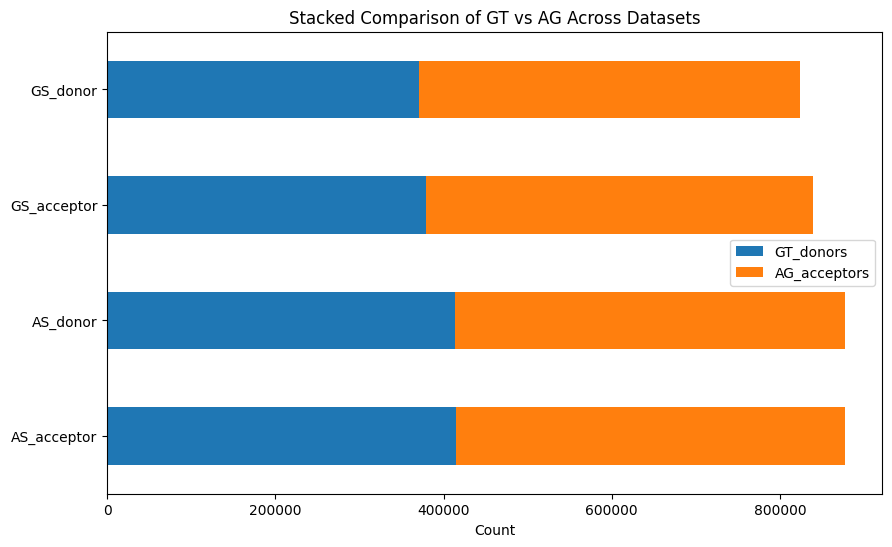

In [14]:
results_df.plot(kind="barh", stacked=True, figsize=(10,6))
plt.title("Stacked Comparison of GT vs AG Across Datasets")
plt.xlabel("Count")
plt.show()